### Import Libraries

In [1]:
#conda install -c glemaitre imbalanced-learn
#pip install mlxtend  


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [4]:
training_data = pd.read_csv('ticdata2000.txt', sep="\t", header=None)

##### Dimensions of Data

In [5]:
training_data.shape

(5822, 86)

##### Peak at the Data

In [6]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [7]:
training_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
5821,33,1,3,3,8,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,0


##### Data types of Attributes

In [8]:
training_data.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
81    int64
82    int64
83    int64
84    int64
85    int64
Length: 86, dtype: object

##### Check Duplicate Reacodes

In [9]:
training_data.duplicated().sum()

602

In [10]:
#Remove duplicate recode
training_data.drop_duplicates(keep='first',inplace=True) # drop duplicates and kepp one of them

In [11]:
training_data.duplicated().sum()

0

##### Check Null Values

In [12]:
training_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
81    0
82    0
83    0
84    0
85    0
Length: 86, dtype: int64

##### Distribution of Classes

In [13]:
training_data[85].value_counts()

0    4880
1     340
Name: 85, dtype: int64

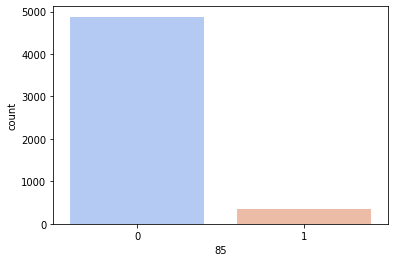

In [14]:
sns.countplot(x=85,data=training_data,palette='coolwarm')

Our Classes Distribution is not good. We need to handle it with Oversampling or undersampling.

#### Oversampling of underrepresented class

In [15]:
X_train = training_data.drop([85],axis=1) # training features
y_train = training_data[85] # training labels

In [16]:
ros = RandomOverSampler(random_state=0) # creating object  of RandomOverSampler
X_train, y_train = ros.fit_sample(X_train, y_train) # creating new samples for class 1.

### Feature Selection

We need to select 10 best features according to our understanding on data. Important features are those features that have strong relationship with output variable. Some important features must be what are ages of customers, what types of customers, what are the incomes of customers, what are professions of cutomers and which insurance they all ready buys. 

Let's use statistical method for finding top 10 features.

##### Univariate Selection Method

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
#apply SelectKBest class to extract top 10 best features
top_features = SelectKBest(score_func=chi2, k=10) # creating object 
select_k_best = top_features.fit(X_train,y_train) # calling fit function for finding important features
df_scores = pd.DataFrame(select_k_best.scores_)
df_scores.columns = ['Score']  #naming the dataframe columns
print(df_scores.nlargest(10,'Score'))  #print 10 best features

NameError: name 'X_train' is not defined

Important features are:

1) Customer Subtype 2) High level education 3) Rented house 4) Home owners 5) Contribution car policies
6) Contribution fire policies 7) Number of car policies 8) Lower level education
9) Income < 30.000 10) Contribution boat policies

Let's Visulize some of them

#### Dependency of prefering caravan policy based on customer subtype

Text(0, 0.5, 'Caravan or not')

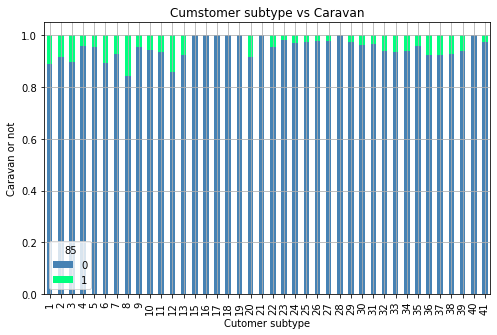

In [19]:
customer_subtype_caravan = pd.crosstab(training_data[0], training_data[85]) # this will gives us counting of caravan policy for each customer subtype 
customer_subtype_caravan_pct = customer_subtype_caravan.div(customer_subtype_caravan.sum(1).astype(float), axis=0) # for getting value between 0 and 1
customer_subtype_caravan_pct.plot(figsize= (8,5), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='Cumstomer subtype vs Caravan', grid=True)
plt.xlabel('Cutomer subtype')
plt.ylabel('Caravan or not')

#### Dependency of prefering caravan policy based on fire policies

Text(0, 0.5, 'Caravan')

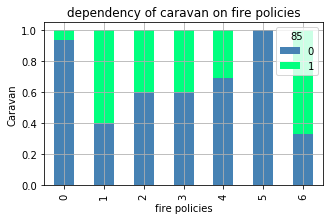

In [20]:
age_caravan = pd.crosstab(training_data[60], training_data[85])
age_caravan_pct = age_caravan.div(age_caravan.sum(1).astype(float),axis=0)
age_caravan_pct.plot(figsize=(5,3), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='dependency of caravan on fire policies', grid=True)
plt.xlabel('fire policies')
plt.ylabel('Caravan')

In [21]:
car_policies = sum( (training_data[85] == 1) & (training_data[67]  != 0)) # counting where car_policies are not zero and also carcaravan policy is 1.
fire_policies = sum( (training_data[85] == 1) & (training_data[58]  != 0)) # counting where fire_policies are not zero and also carcaravan policy is 1.
High_level_education = sum( (training_data[85] == 1) & (training_data[15]  != 0)) # counting where fire_policies are not zero and also carcaravan policy is 1.

In [22]:
# creating Dataframe for showing graph
df = pd.DataFrame(data =[['Number of car policies','Contribution fire policies','High level education'],[car_policies,fire_policies,High_level_education]])

In [23]:
df = df.T # Transpose of dataframe

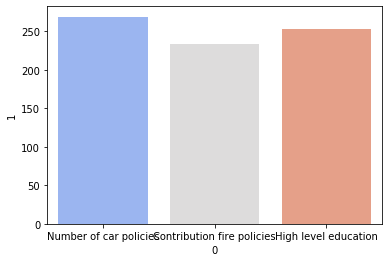

In [24]:
sns.barplot(df[0],df[1],data=df,palette='coolwarm') # count of each

Data visualizations indicate that the buyers of ‘caravan mobile home insurance’ policies also tend to buy ‘car policies’, boat policies and ‘fire policies’. This is a useful insight for cross-selling the caravan policy to the existing customers of ‘car policies’, boat policies and ‘fire policies’. Moreover, other characteristics of ‘caravan mobile home insurance’ buyers generally include ‘High level education’,'Low level of Education' and Income < 30.000.

##### Train Test

In [27]:
X_test = pd.read_csv('Ticeval2000.txt', sep="\t", header=None)
y_test = pd.read_csv('tictgts2000.txt', sep="\t", header=None)

##### Logistic Regression

In [31]:
param_grid = {'C':[0.01,0.1,1,2,3]} # Grid Search Parameter

In [32]:
grid_search = GridSearchCV(LogisticRegression(penalty='l1'), param_grid, cv=5 , n_jobs=-1, iid=True) # creating Grid search variable with logistic Regression(L1) and Cross validation is 5.
grid_search.fit(X_train, y_train) # fit the model

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

##### Let's Check the Best Parameters We find

In [35]:
print(grid_search.best_params_) # show best value of C we found
print(grid_search.best_score_)

{'C': 2}
0.7042008196721311


##### Confusion matrix

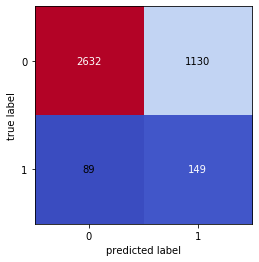

In [34]:
pred=grid_search.predict(X_test) # predict Results
cm = confusion_matrix(y_test,pred) # get confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='coolwarm')
plt.show()

##### F Score

In [36]:
# calculate score
score = fbeta_score(y_test, pred, average='weighted', beta=0.5) # arguments are actual answers and predicted answers
print('F-Measure: %.3f' % score)

F-Measure: 0.853


##### ROC Curve

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [38]:
probs = grid_search.predict_proba(X_test) # Predict Probabilities of classes
preds = probs[:,1] # get probabilies of class 1
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

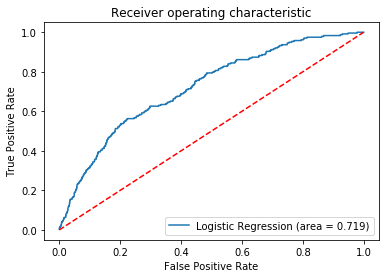

In [39]:
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area Under the Curve is good.

##### Analyze Coefficients

In [40]:
grid_search.best_estimator_.coef_

array([[ 0.02576297, -0.35848752, -0.10429216,  0.26461595, -0.10463258,
        -0.04489199,  0.03605799,  0.08742208, -0.02287665,  0.21659832,
         0.12000291,  0.07478481, -0.03519653, -0.07490826, -0.00874275,
         0.01293899, -0.10488805, -0.24014474,  0.11219424,  0.08687575,
        -0.1284098 ,  0.12982751,  0.02842579,  0.06395425,  0.0325125 ,
         0.02609443,  0.04329713,  0.20373409,  0.03720354, -1.25966516,
        -1.21585697,  0.2350338 ,  0.16184533,  0.15608862, -0.6372379 ,
        -0.67979346,  0.12328778,  0.13895432,  0.06403301,  0.07528939,
        -0.32845211,  0.18565567,  0.0341255 ,  0.5053525 , -0.38924679,
        -0.39833957,  0.20578119,  0.57218434, -0.10537182, -0.82583672,
         0.49027378,  0.43911862, -1.37806317,  0.03494187, -0.22718018,
        -0.6433253 ,  0.26575252,  1.00370872,  0.31431437, -0.22839509,
         0.02211581,  0.49927498, -1.14865132, -0.05840744, -0.76437275,
         0.580257  ,  0.        ,  0.05550512, -3.0

Our Selected Features are synch with non-zero coefficients and their Values are more than other coefficients means they effect the results more then other features.

### Polynomial features with polynomial features

In [33]:
from sklearn.preprocessing import PolynomialFeatures # For creating PolyNomial Features
from sklearn.pipeline import Pipeline # For creating Pipeline, How to performe tasks in line.

In [84]:
poly = PolynomialFeatures(degree = 2) # Creating object with Ploynomial degree 2.
lr = LogisticRegression(penalty='l1') 

In [85]:
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)]) # first convert the features in polynomial than apply logistic Regression
pipe.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

##### Confusion Matrix

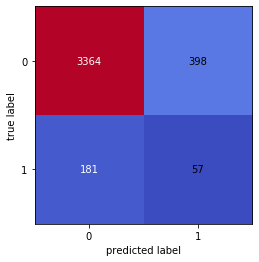

In [86]:
pred=pipe.predict(X_test)
cm = confusion_matrix(y_test,pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='coolwarm')
plt.show()

##### F Score

In [87]:
# calculate score
score = fbeta_score(y_test, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.890


It's look's like our F-Score is inreases which is better than from previous results. But We predict Most of Customer's as they don't buy caravan mobile home insurance but in actual they buy mobile home insurance.

##### ROC Curve

In [88]:
probs = pipe.predict_proba(X_test) 
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

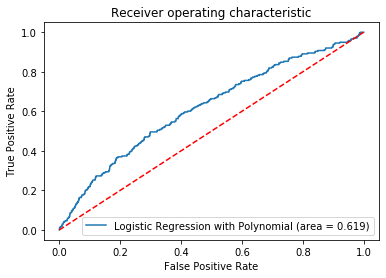

In [89]:
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression with Polynomial (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under the curve of previous model is better than from this curve so previous model is better from this model in term of ROC Curve.

## Random Forest Classifier

In [31]:
from sklearn.preprocessing import MinMaxScaler # For pre_processing
from sklearn.decomposition import PCA # for feature reduction
from sklearn.ensemble import RandomForestClassifier

In [35]:
pipe = Pipeline([("scaler", MinMaxScaler(feature_range = (0,1))),("pca",PCA()), ("classifier", RandomForestClassifier())])
# first apply min-max scaling then extract the important features and them apply RandomForestClassifier

In [36]:
param_grid = {'classifier__n_estimators':list(range(10,101,10))}

In [37]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            m...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

##### Let's Check the Best Parameters We find

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'classifier__n_estimators': 70}
0.9902663934426229


##### Confusion matrix

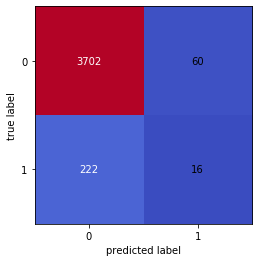

In [39]:
pred=grid.predict(X_test) # predict Results
cm = confusion_matrix(y_test,pred) # get confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='coolwarm')
plt.show()

##### F Score

In [40]:
# calculate score
score = fbeta_score(y_test, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.903


F Score Of this model is greater from other's models but we predicted many class 1 samples wrong.

### ROC Curve

In [41]:
probs = grid.predict_proba(X_test) # Predict Probabilities of classes
preds = probs[:,1] # get positive results mean 1
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

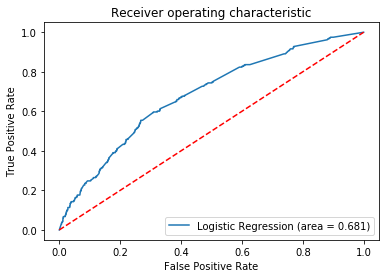

In [42]:
plt.figure()
plt.plot(fpr, tpr,label=' (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under the curve is less than from first First Model so This model is not good in term of ROC Curve.

## Explainabl Model 

We will try to build a model with less number of features which is nearly as good as our best model.

For Model we will use Logistic Regression model

We are using 10 Important Features and check how our model is perform

1) Customer Subtype 2) High level education 3) Rented house 4) Home owners 5) Contribution car policies 6) Contribution fire policies 7) Number of car policies 8) Lower level education 9) Income < 30.000 10) Contribution boat policies

In [85]:
top_10 = X_train[0:,[46,0,29,36,30,15,17,60,58,67]] # this is array so we have to slice important features

In [86]:
lr = LogisticRegression(penalty='l2') # creating object

In [87]:
lr.fit(top_10,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Coefficients

In [88]:
lr.coef_

array([[ 0.20641857, -0.00348387, -0.26992117, -0.08912925, -0.22630144,
         0.05613645, -0.08287657,  0.64172162,  0.10719878,  0.06347325]])

#### Confusion matrix

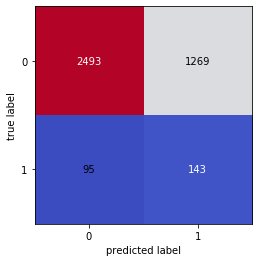

In [89]:
pred=lr.predict(X_test[[46,0,29,36,30,15,17,60,58,67]]) # predict Results
cm = confusion_matrix(y_test,pred) # get confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='coolwarm')
plt.show()

#### F Score

In [90]:
# calculate score
score = fbeta_score(y_test, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.838


 F-Score is Nearly equall to all the model's we have use And also False positive rate is less from all other models.

### ROC Curve

In [124]:
probs = lr.predict_proba(X_test[[46,0,29,36,30,15,17,60,58,67]]) # Predict Probabilities of classes
preds = probs[:,1] # get probabilies of class 1
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

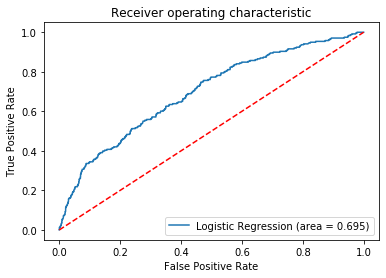

In [125]:
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC is curve is less than from 1st model but it is greater than all other models. So we can say that this model nearly as good as our best model.

### Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os


Features We are using are

46) Contribution car policies 36) Income < 30.000  53) Contribution moped policies 
58) Contribution fire policies 17) Lower level education 60) Contribution boat policies
9) Married 22) Skilled labourers 30) Home owners 15) High level education

These are indexes names.

In [98]:
top_10 = X_train[0:,[46,36,53,58,17,60,9,22,30,15]]

In [115]:
clf = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10)

In [116]:
clf.fit(top_10,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Confusion matrix

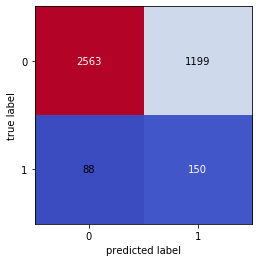

In [117]:
pred=clf.predict(X_test[[46,36,53,58,17,60,9,22,30,15]]) # predict Results
cm = confusion_matrix(y_test,pred) # get confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='coolwarm')
plt.show()

#### F Score

In [118]:
# calculate score
score = fbeta_score(y_test, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.847


### ROC Curve

In [127]:
probs = clf.predict_proba(X_test[[46,0,29,36,30,15,17,60,58,67]]) # Predict Probabilities of classes
preds = probs[:,1] # get probabilies of class 1
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

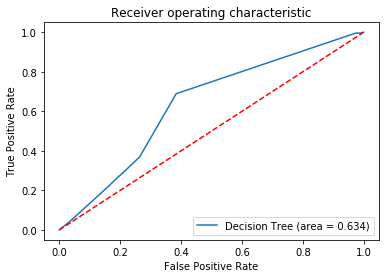

In [129]:
plt.figure()
plt.plot(fpr, tpr,label='Decision Tree (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Let's See Our Tree:

In [119]:
name_columns = [ 'Contribution car policies','Income < 30.000','Contribution moped policies','Contribution fire policies','Lower level education','Contribution boat policies','Married','Skilled labourers','Home owners','High level education']

In [120]:

# Export a tree from the forest
dot_data =export_graphviz(clf,
                feature_names=name_columns,
                filled=True, rounded=True,
                class_names = ['0', '1'],
                out_file=None)

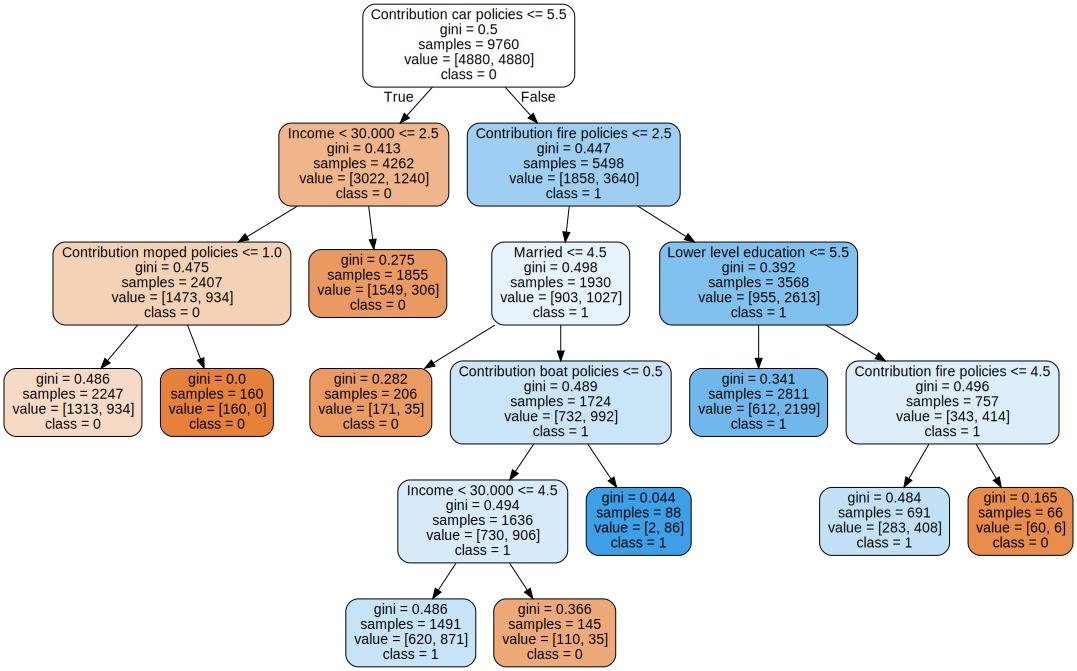

In [122]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
graph = graphviz.Source(dot_data)
graph.render("Decision Tree")
graph 